<a href="https://colab.research.google.com/github/zrcjessica/ml_concepts/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(1)

# The goal of this tutorial

The goal of this tutorial is to implement batch, mini-batch, and stochastic gradient descent on this data to compare how well they manage to recover the coefficients used to generate a set of simulated data points. Because gradient descent is an optimization algorithm, by training on subsets of a dataset simulated with a certain set of parameters, we should be able to recover the coefficients used to simulate the data.


# Simulating the data

We will generate a toy dataset containing $n=10000$ data points using a linear function defined as:

$$
f(x_1, x_2, x_3) = a x_1 + b x_2 + c x_3 + ε
$$

Where ${x_1,x_2,x_3}$ represent an input vector of size 3 and $ε$ represents noise.

To do this, we will first simulate the coefficients of the model, $a,b,$ and $c$ by picking 3 random integers between 1 and 10. 

In [4]:
coeffs = np.random.randint(1,10, size= 3)

print("Coefficients: a = %d, b = %d, c = %d" % (coeffs[0], coeffs[1], coeffs[2]))

Coefficients: a = 1, b = 1, c = 2


Next, we will generate the inputs and the noise for each sample by randomly sampling from the standard normal distribution, and then calculate the outputs based on the equation defined above.

In [5]:
# define number of data points
n = 10000

# define inputs in dataset
X = np.random.randn(n,3)

# define noise
noise = np.random.randn(n)

# get outputs for dataset
y = np.sum(X*coeffs, axis = 1) + noise

Just to help us get a better idea of what the data looks like, let's coerce the dataset we've generated into a data frame and preview it.

In [6]:
pd.DataFrame(np.hstack((X, np.reshape(y, (-1,1)))), columns = ["x1","x2","x3","y"])

,x1,x2,x3,y
0,-0.528172,-1.072969,0.865408,1.416162
1,-2.301539,1.744812,-0.761207,-2.431354
2,0.319039,-0.249370,1.462108,5.236786
3,-2.060141,-0.322417,-0.384054,-0.450817
4,1.133769,-1.099891,-0.172428,0.620125
...,...,...,...,...
9995,-1.923271,0.199603,0.629266,0.765994
9996,0.843702,-2.027953,-0.035839,-0.592611
9997,-1.259567,1.096904,0.689824,1.259755
9998,0.552820,-0.083838,-1.283535,-1.447908


Now let's cover the concepts that will be important for this tutorial.

# Gradient descent 

Gradient descent is an optimization method that is popularly used in machine learning to find the best parameters (more often referred to as _weights_ in the case of neural networks) for a given model. It works quite like how it sounds - by following gradients to descend towards the minimum of a **cost function**. Cost functions are a function of the difference between the true and predicted outputs of a given model. There are a number of different cost functions out there. For example, cross entropy cost functions are popularly used for classification problems while squared error cost functions are popular used for regression problems. Conceptually, gradient descent looks something like this:

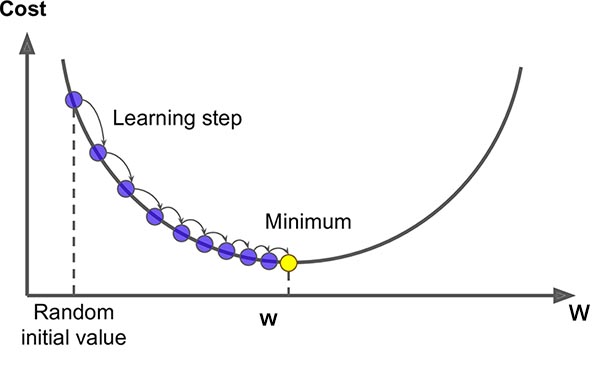

[Image source](https://saugatbhattarai.com.np/what-is-gradient-descent-in-machine-learning/)

The y-axis represents the possible values of the cost function, or error, evaluated for different model weights $\mathbf{w} = \{w_1, w_2,...,w_j\}$ where $j$ is the total number of weights in the model. In the beginning of the model training process, we have random weight values which will yield different errors. At each iteration of training, we will calculate the gradient at the point in the cost function given the current weights, multiply the gradient by a pre-determined **learning rate**, and then descend along the cost function curve accordingly. 

In [11]:
# initialize random weights to start
weights = np.random.randn(3)

# Types of gradient descent

There are a couple of different types of gradient descent out there. In order to understand the differences between these, it is first helpful to define some of the following terms:

- **sample**: a sample is a single data point that can be passed to the model
- **batch**: a hyperparameter which defines the number of samples that the model must evaluate before updating the weights in the model
- **epoch**: a hyperparameter that defines the number of time that the entire training dataset will be passed through the model 

Now, we can start talking about the different types of gradient descent!

## Batch gradient descent 
In batch gradient descent, every data point in our dataset is evaluated in a given training iteration and the gradients are summed for each data point and then used to make a single update to the weights in the model. In other words, **the size of a batch is equivalent to the size of the entire training data set**, and the number of batches in an epoch is 1. 

##### Pros
- Because we only update the model after evaluating all data points, this results in fewer updates and a more computationally efficient training process
- Fewer udpates results in a more stable gradient and more stable convergence

##### Cons
- The more stable gradient may result in the model converging earlier to a less optimal set of parameters, e.g. a local minimum instead of a global minimum
- Prediction errors must be accumulated across all training samples because the model weights are updated after evaluation of all samples
- Usually the entire dataset needs to be loaded in memory for the model to work with it
- Altogether these cons make this approach slower 

## Stochastic gradient descent (SGD)
In stochastic gradient descent, a random subset of the training dataset is evaluated in each training iteration to provide a single update to the weights in the model. Typically, SGD refers to a random subset size of 1; that is, **each batch consists of a single sample**. The number of batches in a single epoch, then, is equivalent to the number of samples in the entire training data set. 

##### Pros
- Because the model weights are updated more frequently, we can have a higher resolution of the how the model performs and how quickly it's learning
- The higher frequency of model updates may help the model learn faster for some problems
- The "noisier" model updates may help the model avoid local minima

##### Cons
- Updating the model more frequently is more computational expensive
- The more frequent model updates result in noisier gradients, resulting in more variance in the error landscape across training epochs
- The noisier updates can also make it harder for the algorithm to optimize 

## (Stochastic) mini-batch gradient descent
As with SGD, we are picking random subsets of the data to pass through the model in order to inform the updating of the weights; however, here **the batch size is somewhere between a single sample and the entirety of the training data set**. Therefore, in a single epoch we see a number of samples roughly equivalent to the total number of samples in the training dataset divided by the batch size. This is very popular for training neural networks.

##### Pros
- More frequency model updates than batch gradient descent allows for a more robust convergence and a better likelihood of avoiding local minima
- Less frequent model updates than SGD results in greater computational efficiency 
- Smaller batches means that we don't have to have the entire training dataset in memory (as with batch gradient descent)

##### Cons
- We have to define an additional batch size hyperparameter 





# Cost function
I will be using two closely related terms in this section: **loss function** and **cost function**. A **loss function** is calculated for a single data point while a **cost function** is the sum of the **losses** across all the points in a batch. For our tutorial, we will use the **Least Squared Error** loss function, which is commonly used for linear regression. For a given sample $j$, it is defined as:

$$
LSE = \frac{1}{2}(\hat{y}_j - y_j)^2
$$

where $\hat{y}_i$ is the predicted output for a given input vector $\mathbf{x_i}$. Its associated cost function is known as **Mean Squared Error (MSE)**:

$$
MSE = \frac{1}{2m} \sum _{j=1} ^{m} (\hat{y}_j - y_j)^2
$$

where $m$ is the total number of training samples. 

In our example, $\hat{y}_j$ is calculated as a linear function that is essentially the dot product between the weights in the model, $\mathbf{w}$ and the inputs for a given sample, $\mathbf{x}_j$:

$$
\hat{y}_j = w_1 x_{i_1} + w_2 x_{i_2} + w_3 x_{i_3}
$$

Thus, the cost function can be expression as a function of $\mathbf{w}$:

$$
J(\mathbf{w}) = \frac{1}{2m} \sum _{j=1} ^{m} ((w_1 x_{j_1} + w_2 x_{j_2} + w_3 x_{j_3}) - y_j)^2
$$
By training on the data we simulated using the coefficients $a, b, c$, we are trying to optimize the weights $w_1, w_2, w_3$ to try to recover the values $a, b, c$ used to generate the data. 


In [51]:
def pred(x, weights):
    """
    predict y given inputs and weights
    """
    y_pred = np.dot(x, weights)
    return y_pred


def mse(y_pred, y_true, m):
    """
    calculate MSE 
    """
    mse = (1/(2*m))*np.sum(np.square(y_pred - y_true))
    return mse


# Learning rate
The learning rate is a small value that determines how far along the curve we move to update the weights. It's important to pick the right learning rate - a large learning rate can result in overshotting the optimum value, while a small learning rate will make it take much longer for the model to converge on the optimum. 

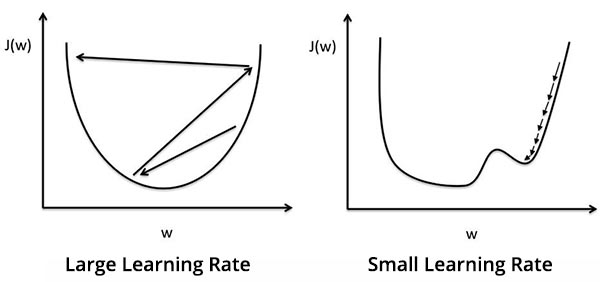

[Image source](https://saugatbhattarai.com.np/what-is-gradient-descent-in-machine-learning/)

The learning rate will be denoted by $\eta$. In our tutorial, let's assign a learning rate of $\eta = 0.01$.


In [63]:
# learning rate
lr = 0.01

# Gradient descent algorithm

In each iteration of the training algorithm, we will update each weight in our model $w_i \rightarrow w_i'$ with the following formula:

$$
w_i' = w_i - \eta \frac{\partial{J}}{\partial{w_i}}
$$

where

$$
\frac{\partial{J}}{\partial{w_i}} = \frac{1}{m} \sum _{j=1} ^{m} ((w_1 x_{j_1} + w_2 x_{j_2} + w_3 x_{j_3}) - y_i)(x_{j_i})
$$

In [64]:
def grad(m, y_pred, y_true, x_i):
    """
    calculate the partial derivative of cost function wrt w_i
    """
    grad = (1/m) * np.sum((y_pred - y_true)*x_i)
    return grad

Now let's begin implementing our code! We'll start with an example of **batch gradient descent**.

# Example - batch gradient descent
In batch gradient descent, each epoch contains only one batch, and the batch size is equivalent to the entire size of the training dataset. We will define 1000 epochs.

In [166]:
epochs = 1000
m = n

In [167]:
# initialize random weights to start
weights = np.random.randn(3)
print("initial weights:")
print(weights)

# collect value of cost function at each iter
cost_list = []

# collect the weights at the end of each epoch
weights_updates = np.zeros((epochs+1, 3))
weights_updates[0,:] = weights

for iter in range(epochs):
    print('epoch = %d' % iter)
          
    # predict on training set 
    y_pred = np.apply_along_axis(pred, 1, arr = X, weights = weights)

    # calculate cost
    cost = mse(y_pred, y, m)
    cost_list.append(cost)

    # update the weights
    for i in range(weights.shape[0]):
        weights[i] = weights[i] - lr*grad(m, y_pred, y, X[:,i])

    print(weights)
    weights_updates[iter+1, :] = weights

initial weights:
[-0.64393633  1.20925393  2.20959021]
epoch = 0
[-0.6275529   1.20716798  2.20784687]
epoch = 1
[-0.61133273  1.20510288  2.20611954]
epoch = 2
[-0.59527419  1.2030584   2.20440806]
epoch = 3
[-0.57937567  1.20103434  2.20271229]
epoch = 4
[-0.56363557  1.19903051  2.20103209]
epoch = 5
[-0.54805231  1.19704669  2.19936731]
epoch = 6
[-0.53262434  1.19508269  2.19771783]
epoch = 7
[-0.5173501   1.1931383   2.19608348]
epoch = 8
[-0.50222807  1.19121334  2.19446415]
epoch = 9
[-0.48725672  1.1893076   2.19285968]
epoch = 10
[-0.47243455  1.18742091  2.19126996]
epoch = 11
[-0.45776008  1.18555305  2.18969483]
epoch = 12
[-0.44323184  1.18370385  2.18813417]
epoch = 13
[-0.42884836  1.18187312  2.18658785]
epoch = 14
[-0.41460821  1.18006068  2.18505573]
epoch = 15
[-0.40050996  1.17826634  2.18353769]
epoch = 16
[-0.38655219  1.17648992  2.18203359]
epoch = 17
[-0.37273351  1.17473125  2.18054332]
epoch = 18
[-0.35905252  1.17299014  2.17906674]
epoch = 19
[-0.34550786 

Let's visualize the MSE over each training iteration:

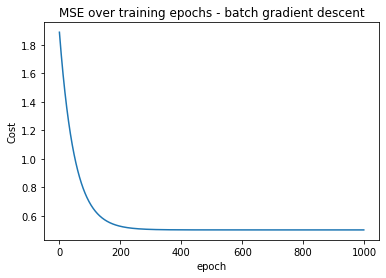

In [168]:
plt.plot(cost_list)
plt.ylabel("Cost")
plt.xlabel("epoch")
plt.title("MSE over training epochs - batch gradient descent")
plt.show()

Let's also visualize how the weights changed at the end of each training epoch:

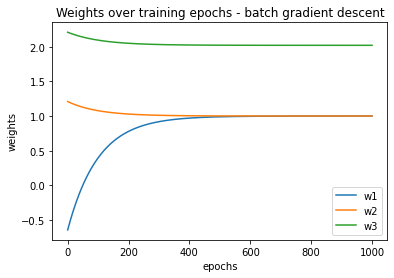

In [173]:
plt.plot(weights_updates[:,0], label = "w1")
plt.plot(weights_updates[:,1], label = "w2")
plt.plot(weights_updates[:,2], label = "w3")
plt.legend()
plt.ylabel('weights')
plt.xlabel("epochs")
plt.title("Weights over training epochs - batch gradient descent")
plt.show()

Now let's take a look at the final weights of the model:

In [170]:
weights

array([1.00021995, 1.00020721, 2.02081245])

Out of curiosity, let's run linear regression on our data and see how the coefficients obtained with the regression compare to what we got with our implementation of gradient descent.

In [171]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
reg.coef_

array([1.00032104, 1.00020243, 2.02069302])

If we compare them to the coefficients we used to simulate this dataset, we can see that they are indeed very close to one another!

In [175]:
model_results = pd.DataFrame(np.array([weights, reg.coef_, coeffs]).transpose(), columns = ['batch gradient descent','linear regression','true coeffs'])
model_results

,batch gradient descent,linear regression,true coeffs
0,1.000220,1.000321,1.0
1,1.000207,1.000202,1.0
2,2.020812,2.020693,2.0


Let's save the weights we obtained using **batch gradient descent** here so we can compare them to weights obtained with other methods later.

In [176]:
weights_bgd = weights

# Example - SGD

Now we'll implement SGD. We will adapt the code from earlier, except now each batch is of size 1 ($m=1$). 

In [179]:
# define batch size
m = 1

# reinitialize weights
weights = np.random.randn(3)

# collect avg cost at each epoch
avg_cost_list = []

# collect the updated weights at each epoch
weights_updates = np.zeros((epochs+1, 3))
weights_updates[0,:] = weights

for iter in range(epochs):
    print('epoch = %d' % iter)
    
    # collect losses for every batch in epoch
    epoch_loss = []

    for batch in range(X.shape[0]//m):
        # predict on training set 
        y_pred = pred(X[batch,:], weights)

        # calculate cost
        cost = mse(y_pred, y[batch], m)
        epoch_loss.append(cost)
        
        # update the weights
        for i in range(weights.shape[0]):
            weights[i] = weights[i] - lr*grad(m, y_pred, y[batch], X[batch,i])
    
    # save avg cost for epoch across all batches
    avg_cost_list.append(np.average(epoch_loss))
    weights_updates[iter+1,:] = weights

epoch = 0
epoch = 1
epoch = 2
epoch = 3
epoch = 4
epoch = 5
epoch = 6
epoch = 7
epoch = 8
epoch = 9
epoch = 10
epoch = 11
epoch = 12
epoch = 13
epoch = 14
epoch = 15
epoch = 16
epoch = 17
epoch = 18
epoch = 19
epoch = 20
epoch = 21
epoch = 22
epoch = 23
epoch = 24
epoch = 25
epoch = 26
epoch = 27
epoch = 28
epoch = 29
epoch = 30
epoch = 31
epoch = 32
epoch = 33
epoch = 34
epoch = 35
epoch = 36
epoch = 37
epoch = 38
epoch = 39
epoch = 40
epoch = 41
epoch = 42
epoch = 43
epoch = 44
epoch = 45
epoch = 46
epoch = 47
epoch = 48
epoch = 49
epoch = 50
epoch = 51
epoch = 52
epoch = 53
epoch = 54
epoch = 55
epoch = 56
epoch = 57
epoch = 58
epoch = 59
epoch = 60
epoch = 61
epoch = 62
epoch = 63
epoch = 64
epoch = 65
epoch = 66
epoch = 67
epoch = 68
epoch = 69
epoch = 70
epoch = 71
epoch = 72
epoch = 73
epoch = 74
epoch = 75
epoch = 76
epoch = 77
epoch = 78
epoch = 79
epoch = 80
epoch = 81
epoch = 82
epoch = 83
epoch = 84
epoch = 85
epoch = 86
epoch = 87
epoch = 88
epoch = 89
epoch = 90
epoch = 9

Now let's look at the average MSE across each training epoch:

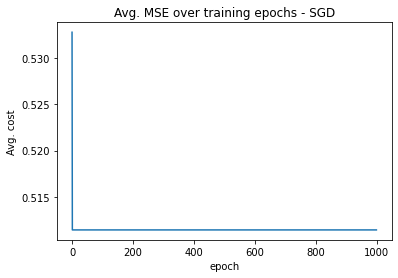

In [180]:
plt.plot(avg_cost_list)
plt.ylabel("Avg. cost")
plt.xlabel("epoch")
plt.title("Avg. MSE over training epochs - SGD")
plt.show()

Let's also look at how the weights changed after each training epoch.

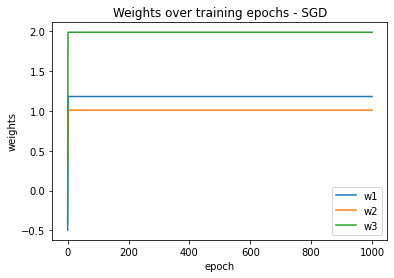

In [182]:
plt.plot(weights_updates[:,0], label = "w1")
plt.plot(weights_updates[:,1], label = "w2")
plt.plot(weights_updates[:,2], label = "w3")
plt.ylabel('weights')
plt.xlabel("epoch")
plt.legend()
plt.title("Weights over training epochs - SGD")
plt.show()

In the previous example of batch gradient descent, it looked like our model began to converge around 200 training epochs. Here, because we updated the model weights after evaluating each sample, we appear to have actually minimized the cost very early on in the training process. However, the weights that the model has converged on seem to be slightly less accurate for $w_1$ compared to batch gradient descent.

In [183]:
model_results['SGD'] = weights
model_results

,batch gradient descent,linear regression,true coeffs,SGD
0,1.000220,1.000321,1.0,1.179115
1,1.000207,1.000202,1.0,1.008264
2,2.020812,2.020693,2.0,1.985073


# Example - mini-batch stochastic gradient descent

Now let's modify the code from the SGD example to accomodate mini-batch gradient descent. Let's define the batch size as $m=100$ to yield 100 batches per epoch. 

In [200]:
def batch(X, y, batch_size):
    # shuffle indices of samples 
    sample_ix = np.arange(n)
    np.random.shuffle(sample_ix)
    
    batches = []

    for batch_ix in range(n//m):
        # determine which samples to pick for batch
        samples_in_batch = sample_ix[batch_ix*m:(batch_ix*m + m )]
        batches.append([X[samples_in_batch,:], y[samples_in_batch]])

    return batches

In [202]:

batches = batch(X, y, m)
len(batches)

100

In [209]:
# define batch size
m = 100

# reinitialize weights
weights = np.random.randn(3)

# collect avg cost at each epoch
avg_cost_list = []

# collect the updated weights at each epoch
weights_updates = np.zeros((epochs+1, 3))
weights_updates[0,:] = weights

# get batched data
batches = batch(X, y, m)

for iter in range(epochs):
    print('epoch = %d' % iter)
    
    # collect losses for every batch in epoch
    epoch_loss = []

    for batch_ix in range(X.shape[0]//m):
    
        batch_X = batches[batch_ix][0]
        batch_y = batches[batch_ix][1]

        # predict on training set 
        y_pred = pred(batch_X, weights)

        # calculate cost
        cost = mse(y_pred, batch_y, m)
        epoch_loss.append(cost)
        
        # update the weights
        for i in range(weights.shape[0]):
            weights[i] = weights[i] - lr*grad(m, y_pred, batch_y, batch_X[:,i])
    
    # save avg cost for epoch across all batches
    avg_cost_list.append(np.average(epoch_loss))
    weights_updates[iter+1,:] = weights

epoch = 0
epoch = 1
epoch = 2
epoch = 3
epoch = 4
epoch = 5
epoch = 6
epoch = 7
epoch = 8
epoch = 9
epoch = 10
epoch = 11
epoch = 12
epoch = 13
epoch = 14
epoch = 15
epoch = 16
epoch = 17
epoch = 18
epoch = 19
epoch = 20
epoch = 21
epoch = 22
epoch = 23
epoch = 24
epoch = 25
epoch = 26
epoch = 27
epoch = 28
epoch = 29
epoch = 30
epoch = 31
epoch = 32
epoch = 33
epoch = 34
epoch = 35
epoch = 36
epoch = 37
epoch = 38
epoch = 39
epoch = 40
epoch = 41
epoch = 42
epoch = 43
epoch = 44
epoch = 45
epoch = 46
epoch = 47
epoch = 48
epoch = 49
epoch = 50
epoch = 51
epoch = 52
epoch = 53
epoch = 54
epoch = 55
epoch = 56
epoch = 57
epoch = 58
epoch = 59
epoch = 60
epoch = 61
epoch = 62
epoch = 63
epoch = 64
epoch = 65
epoch = 66
epoch = 67
epoch = 68
epoch = 69
epoch = 70
epoch = 71
epoch = 72
epoch = 73
epoch = 74
epoch = 75
epoch = 76
epoch = 77
epoch = 78
epoch = 79
epoch = 80
epoch = 81
epoch = 82
epoch = 83
epoch = 84
epoch = 85
epoch = 86
epoch = 87
epoch = 88
epoch = 89
epoch = 90
epoch = 9

Let's visualize the average MSE across each training epoch:


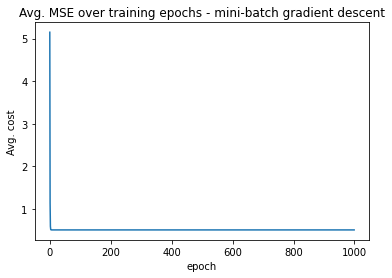

In [210]:
plt.plot(avg_cost_list)
plt.ylabel("Avg. cost")
plt.xlabel("epoch")
plt.title("Avg. MSE over training epochs - mini-batch gradient descent")
plt.show()

And how the weights changed across each epoch:

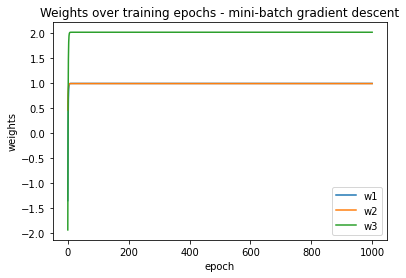

In [213]:
plt.plot(weights_updates[:,0], label = "w1")
plt.plot(weights_updates[:,1], label = "w2")
plt.plot(weights_updates[:,2], label = "w3")
plt.ylabel('weights')
plt.xlabel("epoch")
plt.legend()
plt.title("Weights over training epochs - mini-batch gradient descent")
plt.show()

And finally, compare to the results we got from batch gradient descent and SGD:

In [214]:
model_results['mini-batch'] = weights
model_results

,batch gradient descent,linear regression,true coeffs,SGD,mini-batch
0,1.000220,1.000321,1.0,1.179115,0.998104
1,1.000207,1.000202,1.0,1.008264,0.995475
2,2.020812,2.020693,2.0,1.985073,2.021609


Overall, all methods managed to converge on weights that are close to the true values we used to generate the data, and also comparable to the results of using sklearn's linear regression function. However, we observed that SGD and mini-batch appeared to converge faster. Using SGD and mini-batch gradient descent, we could have probably reduced the number of epochs to reach the optimal weights faster. Using the same number of epochs as we did for batch gradient descent, SGD and mini-batch gradient descent did take longer to run. However, mini-batch gradient descent did run faster than SGD due to the fewer number of weight updates to the model. 